TIP SEPTEMBER

Task 1 Implement Linear regression 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


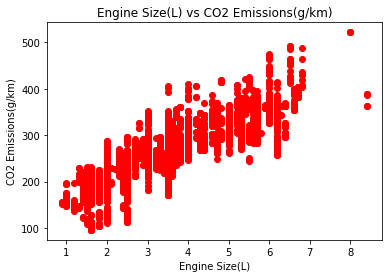

In [ ]:
#matplotlib inline
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Engine Size(L) vs CO2 Emissions(g/km)')
x_axis=df["Engine Size(L)"]
y_axis=df["CO2 Emissions(g/km)"]
plt.scatter(x_axis,y_axis,color='red')

In [ ]:
#checking the relationship between Engine Size and CO2 Emissions by correlation spearman method
x1 = df.iloc[:,3]
x2= df.iloc[:,11] # or [:,-1]
c_data=pd.concat([x1,x2],axis=1)
c_data.corr(method="spearman")

,Engine Size(L),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.869129
CO2 Emissions(g/km),0.869129,1.000000


In [ ]:
#preparing the data for model development
x=df["Engine Size(L)"].values # independant variable
y=df["CO2 Emissions(g/km)"].values # dependent variable

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x)
print(y)

[[2. ]
 [2.4]
 [1.5]
 ...
 [2. ]
 [2. ]
 [2. ]]
[[196]
 [221]
 [136]
 ...
 [240]
 [232]
 [248]]


In [ ]:
#split the data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:

y_pred = pd.DataFrame(y_pred)
df = pd.DataFrame(y_test)
df1=pd.concat([y_pred,df],axis=1)
df1.columns=["predicted","Actual"]
df1

,predicted,Actual
0,244.630717,241
1,207.957399,229
2,273.969371,253
3,226.294058,183
4,244.630717,231
...,...,...
1842,222.626726,199
1843,207.957399,118
1844,339.981343,315
1845,255.632712,276


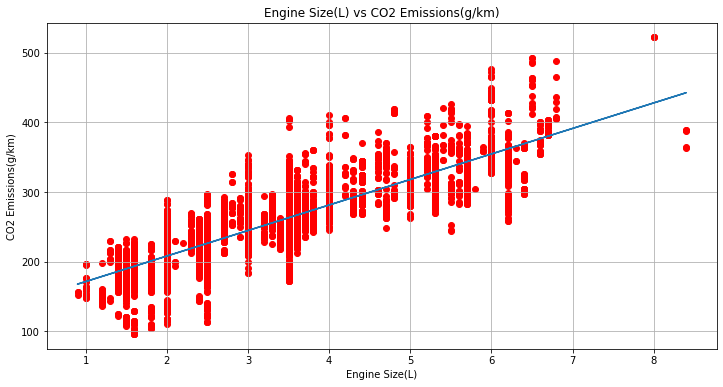

In [ ]:
#plot the regression line and data
line = model.coef_*x+model.intercept_
plt.figure(figsize=(12,6))
plt.scatter(x_axis,y_axis,color='red')
plt.plot(x,line)
plt.title("Engine Size(L) vs CO2 Emissions(g/km)")
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.grid()
plt.show()

In [ ]:
print("Traing Score {}".format(model.score(x_train,y_train)))

Traing Score 0.7238653407342331


In [ ]:
#Evaluationg the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(MSE)
r2=r2_score(y_test,y_pred)

print("Mean Absolute Error {}".format(MAE))
#print("\n")
print("Mean Squared Error {}".format(MSE))
#print("\n")
print("Root Mean Squared Error {}".format(RMSE))
#print("\n")
print("R2 Score {}".format(r2))

Mean Absolute Error 23.278811916762198
Mean Squared Error 945.22850175014
Root Mean Squared Error 30.74456865448172
R2 Score 0.7260943102240828


The model has been created and the MAS,MSE,RMSE and R2 Score has been evaluted.
Thank You!